In [51]:
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

pd.options.mode.chained_assignment = None  # default='warn'

data_key = pd.read_csv('key.csv')
data_key = data_key[data_key['station_nbr'] != 5]
data_weather = pd.read_csv('weather.csv')
data_weather = data_weather[data_weather['station_nbr'] != 5] ## Station 5번 제거한 나머지
data_train = pd.read_csv('train.csv')

df = pd.merge(data_weather, data_key)
station_nbr = df['station_nbr']
df.drop('station_nbr', axis=1, inplace=True)
df['station_nbr'] = station_nbr
df = pd.merge(df, data_train)
# Station 5번을 뺀 나머지 Merge 완성
# 'M'과 '-'을 np.nan으로 값을 변경하기 전에, '  T'값을 먼저 snowfall=0.05, preciptotal = 0.005로 변경하자 
df['snowfall'][df['snowfall'] == '  T'] = 0.05
df['preciptotal'][df['preciptotal'] == '  T'] = 0.005
df['snowfall'][df['snowfall'] == '  T'], df['preciptotal'][df['preciptotal'] == '  T']
# T 값 변경 완료. 이제, 19개 Station 별로 정리하기 (5번 Station 생략)
df['snowfall'][df['snowfall'] == '  T'] = 0.05
df['preciptotal'][df['preciptotal'] == '  T'] = 0.005
# T 값 변경 완료. 이제, 19개 Station 별로 정리하기 (5번 Station 생략)
df_s_1 = df[df['station_nbr'] == 1]; df_s_8 = df[df['station_nbr'] == 8]; df_s_15 = df[df['station_nbr'] == 15]
df_s_2 = df[df['station_nbr'] == 2]; df_s_9 = df[df['station_nbr'] == 9]; df_s_16 = df[df['station_nbr'] == 16]
df_s_3 = df[df['station_nbr'] == 3]; df_s_10 = df[df['station_nbr'] == 10]; df_s_17 = df[df['station_nbr'] == 17]
df_s_4 = df[df['station_nbr'] == 4]; df_s_11 = df[df['station_nbr'] == 11]; df_s_18 = df[df['station_nbr'] == 18]
df_s_5 = df[df['station_nbr'] == 5]; df_s_12 = df[df['station_nbr'] == 12]; df_s_19 = df[df['station_nbr'] == 19]
df_s_6 = df[df['station_nbr'] == 6]; df_s_13 = df[df['station_nbr'] == 13]; df_s_20 = df[df['station_nbr'] == 20]
df_s_7 = df[df['station_nbr'] == 7]; df_s_14 = df[df['station_nbr'] == 14]

In [52]:
df_s_1.head()

date tmax tmin tavg depart dewpoint wetbulb heat cool sunrise  ...    \
0  2012-01-01   52   31   42      M       36      40   23    0       -  ...     
1  2012-01-01   52   31   42      M       36      40   23    0       -  ...     
2  2012-01-01   52   31   42      M       36      40   23    0       -  ...     
3  2012-01-01   52   31   42      M       36      40   23    0       -  ...     
4  2012-01-01   52   31   42      M       36      40   23    0       -  ...     

  preciptotal stnpressure sealevel resultspeed resultdir avgspeed store_nbr  \
0        0.05       29.78    29.92         3.6        20      4.6         1   
1        0.05       29.78    29.92         3.6        20      4.6         1   
2        0.05       29.78    29.92         3.6        20      4.6         1   
3        0.05       29.78    29.92         3.6        20      4.6         1   
4        0.05       29.78    29.92         3.6        20      4.6         1   

  station_nbr item_nbr  units  
0           1        1      0  
1           1        2      0  
2           1        3      0  
3           1        4      0  
4           1        5      0  

[5 rows x 23 columns]

## 모든 Station의 'M' & '-'를 np.nan으로 바꾼 후, 각각의 column의 mean값을 넣어서
## 각 Station 별로 Dataframe 설정 완료 하였음.
## 따라서, 여기서 부터 각 station의 column별 상관 관계를 찾아보면 됨.

In [70]:
#station 1
cols1 = df_s_1.columns.drop(['date', 'codesum'])
df_s_1[cols1] = df_s_1[cols1].apply(pd.to_numeric, errors='coerce')

df_s_1['tmax'][df_s_1['tmax'].isnull()] = df_s_1['tmax'].mean()
df_s_1['tmin'][df_s_1['tmin'].isnull()] = df_s_1['tmax'].mean()
df_s_1['tavg'][df_s_1['tavg'].isnull()] = df_s_1['tavg'].mean()
df_s_1['depart'][df_s_1['depart'].isnull()] = df_s_1['depart'].mean()
df_s_1['dewpoint'][df_s_1['dewpoint'].isnull()] = df_s_1['dewpoint'].mean()
df_s_1['wetbulb'][df_s_1['wetbulb'].isnull()] = df_s_1['wetbulb'].mean()
df_s_1['heat'][df_s_1['heat'].isnull()] = df_s_1['heat'].mean()
df_s_1['cool'][df_s_1['cool'].isnull()] = df_s_1['cool'].mean()
df_s_1['sunrise'][df_s_1['sunrise'].isnull()] = df_s_1['sunrise'].mean()
df_s_1['sunset'][df_s_1['sunset'].isnull()] = df_s_1['sunset'].mean()
df_s_1['snowfall'][df_s_1['snowfall'].isnull()] = df_s_1['snowfall'].mean()
df_s_1['preciptotal'][df_s_1['preciptotal'].isnull()] = df_s_1['preciptotal'].mean()
df_s_1['stnpressure'][df_s_1['stnpressure'].isnull()] = df_s_1['stnpressure'].mean()
df_s_1['sealevel'][df_s_1['sealevel'].isnull()] = df_s_1['sealevel'].mean()
df_s_1['resultspeed'][df_s_1['resultspeed'].isnull()] = df_s_1['resultspeed'].mean()
df_s_1['resultdir'][df_s_1['resultdir'].isnull()] = df_s_1['resultdir'].mean()
df_s_1['avgspeed'][df_s_1['avgspeed'].isnull()] = df_s_1['avgspeed'].mean()

#station 2
cols2 = df_s_2.columns.drop(['date', 'codesum'])
df_s_2[cols2] = df_s_2[cols2].apply(pd.to_numeric, errors='coerce')

df_s_2['tmax'][df_s_2['tmax'].isnull()] = df_s_2['tmax'].mean()
df_s_2['tmin'][df_s_2['tmin'].isnull()] = df_s_2['tmax'].mean()
df_s_2['tavg'][df_s_2['tavg'].isnull()] = df_s_2['tavg'].mean()
df_s_2['depart'][df_s_2['depart'].isnull()] = df_s_2['depart'].mean()
df_s_2['dewpoint'][df_s_2['dewpoint'].isnull()] = df_s_2['dewpoint'].mean()
df_s_2['wetbulb'][df_s_2['wetbulb'].isnull()] = df_s_2['wetbulb'].mean()
df_s_2['heat'][df_s_2['heat'].isnull()] = df_s_2['heat'].mean()
df_s_2['cool'][df_s_2['cool'].isnull()] = df_s_2['cool'].mean()
df_s_2['sunrise'][df_s_2['sunrise'].isnull()] = df_s_2['sunrise'].mean()
df_s_2['sunset'][df_s_2['sunset'].isnull()] = df_s_2['sunset'].mean()
df_s_2['snowfall'][df_s_2['snowfall'].isnull()] = df_s_2['snowfall'].mean()
df_s_2['preciptotal'][df_s_2['preciptotal'].isnull()] = df_s_2['preciptotal'].mean()
df_s_2['stnpressure'][df_s_2['stnpressure'].isnull()] = df_s_2['stnpressure'].mean()
df_s_2['sealevel'][df_s_2['sealevel'].isnull()] = df_s_2['sealevel'].mean()
df_s_2['resultspeed'][df_s_2['resultspeed'].isnull()] = df_s_2['resultspeed'].mean()
df_s_2['resultdir'][df_s_2['resultdir'].isnull()] = df_s_2['resultdir'].mean()
df_s_2['avgspeed'][df_s_2['avgspeed'].isnull()] = df_s_2['avgspeed'].mean()

#station 3
cols3 = df_s_3.columns.drop(['date', 'codesum'])
df_s_3[cols3] = df_s_3[cols3].apply(pd.to_numeric, errors='coerce')

df_s_3['tmax'][df_s_3['tmax'].isnull()] = df_s_3['tmax'].mean()
df_s_3['tmin'][df_s_3['tmin'].isnull()] = df_s_3['tmax'].mean()
df_s_3['tavg'][df_s_3['tavg'].isnull()] = df_s_3['tavg'].mean()
df_s_3['depart'][df_s_3['depart'].isnull()] = df_s_3['depart'].mean()
df_s_3['dewpoint'][df_s_3['dewpoint'].isnull()] = df_s_3['dewpoint'].mean()
df_s_3['wetbulb'][df_s_3['wetbulb'].isnull()] = df_s_3['wetbulb'].mean()
df_s_3['heat'][df_s_3['heat'].isnull()] = df_s_3['heat'].mean()
df_s_3['cool'][df_s_3['cool'].isnull()] = df_s_3['cool'].mean()
df_s_3['sunrise'][df_s_3['sunrise'].isnull()] = df_s_3['sunrise'].mean()
df_s_3['sunset'][df_s_3['sunset'].isnull()] = df_s_3['sunset'].mean()
df_s_3['snowfall'][df_s_3['snowfall'].isnull()] = df_s_3['snowfall'].mean()
df_s_3['preciptotal'][df_s_3['preciptotal'].isnull()] = df_s_3['preciptotal'].mean()
df_s_3['stnpressure'][df_s_3['stnpressure'].isnull()] = df_s_3['stnpressure'].mean()
df_s_3['sealevel'][df_s_3['sealevel'].isnull()] = df_s_3['sealevel'].mean()
df_s_3['resultspeed'][df_s_3['resultspeed'].isnull()] = df_s_3['resultspeed'].mean()
df_s_3['resultdir'][df_s_3['resultdir'].isnull()] = df_s_3['resultdir'].mean()
df_s_3['avgspeed'][df_s_3['avgspeed'].isnull()] = df_s_3['avgspeed'].mean()

#station 4
cols4 = df_s_4.columns.drop(['date', 'codesum'])
df_s_4[cols4] = df_s_4[cols4].apply(pd.to_numeric, errors='coerce')

df_s_4['tmax'][df_s_4['tmax'].isnull()] = df_s_4['tmax'].mean()
df_s_4['tmin'][df_s_4['tmin'].isnull()] = df_s_4['tmax'].mean()
df_s_4['tavg'][df_s_4['tavg'].isnull()] = df_s_4['tavg'].mean()
df_s_4['depart'][df_s_4['depart'].isnull()] = df_s_4['depart'].mean()
df_s_4['dewpoint'][df_s_4['dewpoint'].isnull()] = df_s_4['dewpoint'].mean()
df_s_4['wetbulb'][df_s_4['wetbulb'].isnull()] = df_s_4['wetbulb'].mean()
df_s_4['heat'][df_s_4['heat'].isnull()] = df_s_4['heat'].mean()
df_s_4['cool'][df_s_4['cool'].isnull()] = df_s_4['cool'].mean()
df_s_4['sunrise'][df_s_4['sunrise'].isnull()] = df_s_4['sunrise'].mean()
df_s_4['sunset'][df_s_4['sunset'].isnull()] = df_s_4['sunset'].mean()
df_s_4['snowfall'][df_s_4['snowfall'].isnull()] = df_s_4['snowfall'].mean()
df_s_4['preciptotal'][df_s_4['preciptotal'].isnull()] = df_s_4['preciptotal'].mean()
df_s_4['stnpressure'][df_s_4['stnpressure'].isnull()] = df_s_4['stnpressure'].mean()
df_s_4['sealevel'][df_s_4['sealevel'].isnull()] = df_s_4['sealevel'].mean()
df_s_4['resultspeed'][df_s_4['resultspeed'].isnull()] = df_s_4['resultspeed'].mean()
df_s_4['resultdir'][df_s_4['resultdir'].isnull()] = df_s_4['resultdir'].mean()
df_s_4['avgspeed'][df_s_4['avgspeed'].isnull()] = df_s_4['avgspeed'].mean()

#station 5
cols5 = df_s_5.columns.drop(['date', 'codesum'])
df_s_5[cols5] = df_s_5[cols5].apply(pd.to_numeric, errors='coerce')

df_s_5['tmax'][df_s_5['tmax'].isnull()] = df_s_5['tmax'].mean()
df_s_5['tmin'][df_s_5['tmin'].isnull()] = df_s_5['tmax'].mean()
df_s_5['tavg'][df_s_5['tavg'].isnull()] = df_s_5['tavg'].mean()
df_s_5['depart'][df_s_5['depart'].isnull()] = df_s_5['depart'].mean()
df_s_5['dewpoint'][df_s_5['dewpoint'].isnull()] = df_s_5['dewpoint'].mean()
df_s_5['wetbulb'][df_s_5['wetbulb'].isnull()] = df_s_5['wetbulb'].mean()
df_s_5['heat'][df_s_5['heat'].isnull()] = df_s_5['heat'].mean()
df_s_5['cool'][df_s_5['cool'].isnull()] = df_s_5['cool'].mean()
df_s_5['sunrise'][df_s_5['sunrise'].isnull()] = df_s_5['sunrise'].mean()
df_s_5['sunset'][df_s_5['sunset'].isnull()] = df_s_5['sunset'].mean()
df_s_5['snowfall'][df_s_5['snowfall'].isnull()] = df_s_5['snowfall'].mean()
df_s_5['preciptotal'][df_s_5['preciptotal'].isnull()] = df_s_5['preciptotal'].mean()
df_s_5['stnpressure'][df_s_5['stnpressure'].isnull()] = df_s_5['stnpressure'].mean()
df_s_5['sealevel'][df_s_5['sealevel'].isnull()] = df_s_5['sealevel'].mean()
df_s_5['resultspeed'][df_s_5['resultspeed'].isnull()] = df_s_5['resultspeed'].mean()
df_s_5['resultdir'][df_s_5['resultdir'].isnull()] = df_s_5['resultdir'].mean()
df_s_5['avgspeed'][df_s_5['avgspeed'].isnull()] = df_s_5['avgspeed'].mean()

#station 6
cols6 = df_s_6.columns.drop(['date', 'codesum'])
df_s_6[cols6] = df_s_6[cols6].apply(pd.to_numeric, errors='coerce')

df_s_6['tmax'][df_s_6['tmax'].isnull()] = df_s_6['tmax'].mean()
df_s_6['tmin'][df_s_6['tmin'].isnull()] = df_s_6['tmax'].mean()
df_s_6['tavg'][df_s_6['tavg'].isnull()] = df_s_6['tavg'].mean()
df_s_6['depart'][df_s_6['depart'].isnull()] = df_s_6['depart'].mean()
df_s_6['dewpoint'][df_s_6['dewpoint'].isnull()] = df_s_6['dewpoint'].mean()
df_s_6['wetbulb'][df_s_6['wetbulb'].isnull()] = df_s_6['wetbulb'].mean()
df_s_6['heat'][df_s_6['heat'].isnull()] = df_s_6['heat'].mean()
df_s_6['cool'][df_s_6['cool'].isnull()] = df_s_6['cool'].mean()
df_s_6['sunrise'][df_s_6['sunrise'].isnull()] = df_s_6['sunrise'].mean()
df_s_6['sunset'][df_s_6['sunset'].isnull()] = df_s_6['sunset'].mean()
df_s_6['snowfall'][df_s_6['snowfall'].isnull()] = df_s_6['snowfall'].mean()
df_s_6['preciptotal'][df_s_6['preciptotal'].isnull()] = df_s_6['preciptotal'].mean()
df_s_6['stnpressure'][df_s_6['stnpressure'].isnull()] = df_s_6['stnpressure'].mean()
df_s_6['sealevel'][df_s_6['sealevel'].isnull()] = df_s_6['sealevel'].mean()
df_s_6['resultspeed'][df_s_6['resultspeed'].isnull()] = df_s_6['resultspeed'].mean()
df_s_6['resultdir'][df_s_6['resultdir'].isnull()] = df_s_6['resultdir'].mean()
df_s_6['avgspeed'][df_s_6['avgspeed'].isnull()] = df_s_6['avgspeed'].mean()

#station 7
cols7 = df_s_7.columns.drop(['date', 'codesum'])
df_s_7[cols7] = df_s_7[cols7].apply(pd.to_numeric, errors='coerce')

df_s_7['tmax'][df_s_7['tmax'].isnull()] = df_s_7['tmax'].mean()
df_s_7['tmin'][df_s_7['tmin'].isnull()] = df_s_7['tmax'].mean()
df_s_7['tavg'][df_s_7['tavg'].isnull()] = df_s_7['tavg'].mean()
df_s_7['depart'][df_s_7['depart'].isnull()] = df_s_7['depart'].mean()
df_s_7['dewpoint'][df_s_7['dewpoint'].isnull()] = df_s_7['dewpoint'].mean()
df_s_7['wetbulb'][df_s_7['wetbulb'].isnull()] = df_s_7['wetbulb'].mean()
df_s_7['heat'][df_s_7['heat'].isnull()] = df_s_7['heat'].mean()
df_s_7['cool'][df_s_7['cool'].isnull()] = df_s_7['cool'].mean()
df_s_7['sunrise'][df_s_7['sunrise'].isnull()] = df_s_7['sunrise'].mean()
df_s_7['sunset'][df_s_7['sunset'].isnull()] = df_s_7['sunset'].mean()
df_s_7['snowfall'][df_s_7['snowfall'].isnull()] = df_s_7['snowfall'].mean()
df_s_7['preciptotal'][df_s_7['preciptotal'].isnull()] = df_s_7['preciptotal'].mean()
df_s_7['stnpressure'][df_s_7['stnpressure'].isnull()] = df_s_7['stnpressure'].mean()
df_s_7['sealevel'][df_s_7['sealevel'].isnull()] = df_s_7['sealevel'].mean()
df_s_7['resultspeed'][df_s_7['resultspeed'].isnull()] = df_s_7['resultspeed'].mean()
df_s_7['resultdir'][df_s_7['resultdir'].isnull()] = df_s_7['resultdir'].mean()
df_s_7['avgspeed'][df_s_7['avgspeed'].isnull()] = df_s_7['avgspeed'].mean()

#station 8
cols8 = df_s_8.columns.drop(['date', 'codesum'])
df_s_8[cols8] = df_s_8[cols8].apply(pd.to_numeric, errors='coerce')

df_s_8['tmax'][df_s_8['tmax'].isnull()] = df_s_8['tmax'].mean()
df_s_8['tmin'][df_s_8['tmin'].isnull()] = df_s_8['tmax'].mean()
df_s_8['tavg'][df_s_8['tavg'].isnull()] = df_s_8['tavg'].mean()
df_s_8['depart'][df_s_8['depart'].isnull()] = df_s_8['depart'].mean()
df_s_8['dewpoint'][df_s_8['dewpoint'].isnull()] = df_s_8['dewpoint'].mean()
df_s_8['wetbulb'][df_s_8['wetbulb'].isnull()] = df_s_8['wetbulb'].mean()
df_s_8['heat'][df_s_8['heat'].isnull()] = df_s_8['heat'].mean()
df_s_8['cool'][df_s_8['cool'].isnull()] = df_s_8['cool'].mean()
df_s_8['sunrise'][df_s_8['sunrise'].isnull()] = df_s_8['sunrise'].mean()
df_s_8['sunset'][df_s_8['sunset'].isnull()] = df_s_8['sunset'].mean()
df_s_8['snowfall'][df_s_8['snowfall'].isnull()] = df_s_8['snowfall'].mean()
df_s_8['preciptotal'][df_s_8['preciptotal'].isnull()] = df_s_8['preciptotal'].mean()
df_s_8['stnpressure'][df_s_8['stnpressure'].isnull()] = df_s_8['stnpressure'].mean()
df_s_8['sealevel'][df_s_8['sealevel'].isnull()] = df_s_8['sealevel'].mean()
df_s_8['resultspeed'][df_s_8['resultspeed'].isnull()] = df_s_8['resultspeed'].mean()
df_s_8['resultdir'][df_s_8['resultdir'].isnull()] = df_s_8['resultdir'].mean()
df_s_8['avgspeed'][df_s_8['avgspeed'].isnull()] = df_s_8['avgspeed'].mean()

#station 9
cols9 = df_s_9.columns.drop(['date', 'codesum'])
df_s_9[cols9] = df_s_9[cols9].apply(pd.to_numeric, errors='coerce')

df_s_9['tmax'][df_s_9['tmax'].isnull()] = df_s_9['tmax'].mean()
df_s_9['tmin'][df_s_9['tmin'].isnull()] = df_s_9['tmax'].mean()
df_s_9['tavg'][df_s_9['tavg'].isnull()] = df_s_9['tavg'].mean()
df_s_9['depart'][df_s_9['depart'].isnull()] = df_s_9['depart'].mean()
df_s_9['dewpoint'][df_s_9['dewpoint'].isnull()] = df_s_9['dewpoint'].mean()
df_s_9['wetbulb'][df_s_9['wetbulb'].isnull()] = df_s_9['wetbulb'].mean()
df_s_9['heat'][df_s_9['heat'].isnull()] = df_s_9['heat'].mean()
df_s_9['cool'][df_s_9['cool'].isnull()] = df_s_9['cool'].mean()
df_s_9['sunrise'][df_s_9['sunrise'].isnull()] = df_s_9['sunrise'].mean()
df_s_9['sunset'][df_s_9['sunset'].isnull()] = df_s_9['sunset'].mean()
df_s_9['snowfall'][df_s_9['snowfall'].isnull()] = df_s_9['snowfall'].mean()
df_s_9['preciptotal'][df_s_9['preciptotal'].isnull()] = df_s_9['preciptotal'].mean()
df_s_9['stnpressure'][df_s_9['stnpressure'].isnull()] = df_s_9['stnpressure'].mean()
df_s_9['sealevel'][df_s_9['sealevel'].isnull()] = df_s_9['sealevel'].mean()
df_s_9['resultspeed'][df_s_9['resultspeed'].isnull()] = df_s_9['resultspeed'].mean()
df_s_9['resultdir'][df_s_9['resultdir'].isnull()] = df_s_9['resultdir'].mean()
df_s_9['avgspeed'][df_s_9['avgspeed'].isnull()] = df_s_9['avgspeed'].mean()

#station 10
cols10 = df_s_10.columns.drop(['date', 'codesum'])
df_s_10[cols10] = df_s_10[cols10].apply(pd.to_numeric, errors='coerce')

df_s_10['tmax'][df_s_10['tmax'].isnull()] = df_s_10['tmax'].mean()
df_s_10['tmin'][df_s_10['tmin'].isnull()] = df_s_10['tmax'].mean()
df_s_10['tavg'][df_s_10['tavg'].isnull()] = df_s_10['tavg'].mean()
df_s_10['depart'][df_s_10['depart'].isnull()] = df_s_10['depart'].mean()
df_s_10['dewpoint'][df_s_10['dewpoint'].isnull()] = df_s_10['dewpoint'].mean()
df_s_10['wetbulb'][df_s_10['wetbulb'].isnull()] = df_s_10['wetbulb'].mean()
df_s_10['heat'][df_s_10['heat'].isnull()] = df_s_10['heat'].mean()
df_s_10['cool'][df_s_10['cool'].isnull()] = df_s_10['cool'].mean()
df_s_10['sunrise'][df_s_10['sunrise'].isnull()] = df_s_10['sunrise'].mean()
df_s_10['sunset'][df_s_10['sunset'].isnull()] = df_s_10['sunset'].mean()
df_s_10['snowfall'][df_s_10['snowfall'].isnull()] = df_s_10['snowfall'].mean()
df_s_10['preciptotal'][df_s_10['preciptotal'].isnull()] = df_s_10['preciptotal'].mean()
df_s_10['stnpressure'][df_s_10['stnpressure'].isnull()] = df_s_10['stnpressure'].mean()
df_s_10['sealevel'][df_s_10['sealevel'].isnull()] = df_s_10['sealevel'].mean()
df_s_10['resultspeed'][df_s_10['resultspeed'].isnull()] = df_s_10['resultspeed'].mean()
df_s_10['resultdir'][df_s_10['resultdir'].isnull()] = df_s_10['resultdir'].mean()
df_s_10['avgspeed'][df_s_10['avgspeed'].isnull()] = df_s_10['avgspeed'].mean()

#station 11
cols11 = df_s_11.columns.drop(['date', 'codesum'])
df_s_11[cols11] = df_s_11[cols11].apply(pd.to_numeric, errors='coerce')

df_s_11['tmax'][df_s_11['tmax'].isnull()] = df_s_11['tmax'].mean()
df_s_11['tmin'][df_s_11['tmin'].isnull()] = df_s_11['tmax'].mean()
df_s_11['tavg'][df_s_11['tavg'].isnull()] = df_s_11['tavg'].mean()
df_s_11['depart'][df_s_11['depart'].isnull()] = df_s_11['depart'].mean()
df_s_11['dewpoint'][df_s_11['dewpoint'].isnull()] = df_s_11['dewpoint'].mean()
df_s_11['wetbulb'][df_s_11['wetbulb'].isnull()] = df_s_11['wetbulb'].mean()
df_s_11['heat'][df_s_11['heat'].isnull()] = df_s_11['heat'].mean()
df_s_11['cool'][df_s_11['cool'].isnull()] = df_s_11['cool'].mean()
df_s_11['sunrise'][df_s_11['sunrise'].isnull()] = df_s_11['sunrise'].mean()
df_s_11['sunset'][df_s_11['sunset'].isnull()] = df_s_11['sunset'].mean()
df_s_11['snowfall'][df_s_11['snowfall'].isnull()] = df_s_11['snowfall'].mean()
df_s_11['preciptotal'][df_s_11['preciptotal'].isnull()] = df_s_11['preciptotal'].mean()
df_s_11['stnpressure'][df_s_11['stnpressure'].isnull()] = df_s_11['stnpressure'].mean()
df_s_11['sealevel'][df_s_11['sealevel'].isnull()] = df_s_11['sealevel'].mean()
df_s_11['resultspeed'][df_s_11['resultspeed'].isnull()] = df_s_11['resultspeed'].mean()
df_s_11['resultdir'][df_s_11['resultdir'].isnull()] = df_s_11['resultdir'].mean()
df_s_11['avgspeed'][df_s_11['avgspeed'].isnull()] = df_s_11['avgspeed'].mean()

#station 12
cols12 = df_s_12.columns.drop(['date', 'codesum'])
df_s_12[cols12] = df_s_12[cols12].apply(pd.to_numeric, errors='coerce')

df_s_12['tmax'][df_s_12['tmax'].isnull()] = df_s_12['tmax'].mean()
df_s_12['tmin'][df_s_12['tmin'].isnull()] = df_s_12['tmax'].mean()
df_s_12['tavg'][df_s_12['tavg'].isnull()] = df_s_12['tavg'].mean()
df_s_12['depart'][df_s_12['depart'].isnull()] = df_s_12['depart'].mean()
df_s_12['dewpoint'][df_s_12['dewpoint'].isnull()] = df_s_12['dewpoint'].mean()
df_s_12['wetbulb'][df_s_12['wetbulb'].isnull()] = df_s_12['wetbulb'].mean()
df_s_12['heat'][df_s_12['heat'].isnull()] = df_s_12['heat'].mean()
df_s_12['cool'][df_s_12['cool'].isnull()] = df_s_12['cool'].mean()
df_s_12['sunrise'][df_s_12['sunrise'].isnull()] = df_s_12['sunrise'].mean()
df_s_12['sunset'][df_s_12['sunset'].isnull()] = df_s_12['sunset'].mean()
df_s_12['snowfall'][df_s_12['snowfall'].isnull()] = df_s_12['snowfall'].mean()
df_s_12['preciptotal'][df_s_12['preciptotal'].isnull()] = df_s_12['preciptotal'].mean()
df_s_12['stnpressure'][df_s_12['stnpressure'].isnull()] = df_s_12['stnpressure'].mean()
df_s_12['sealevel'][df_s_12['sealevel'].isnull()] = df_s_12['sealevel'].mean()
df_s_12['resultspeed'][df_s_12['resultspeed'].isnull()] = df_s_12['resultspeed'].mean()
df_s_12['resultdir'][df_s_12['resultdir'].isnull()] = df_s_12['resultdir'].mean()
df_s_12['avgspeed'][df_s_12['avgspeed'].isnull()] = df_s_12['avgspeed'].mean()

#station 13
cols13 = df_s_13.columns.drop(['date', 'codesum'])
df_s_13[cols13] = df_s_13[cols13].apply(pd.to_numeric, errors='coerce')

df_s_13['tmax'][df_s_13['tmax'].isnull()] = df_s_13['tmax'].mean()
df_s_13['tmin'][df_s_13['tmin'].isnull()] = df_s_13['tmax'].mean()
df_s_13['tavg'][df_s_13['tavg'].isnull()] = df_s_13['tavg'].mean()
df_s_13['depart'][df_s_13['depart'].isnull()] = df_s_13['depart'].mean()
df_s_13['dewpoint'][df_s_13['dewpoint'].isnull()] = df_s_13['dewpoint'].mean()
df_s_13['wetbulb'][df_s_13['wetbulb'].isnull()] = df_s_13['wetbulb'].mean()
df_s_13['heat'][df_s_13['heat'].isnull()] = df_s_13['heat'].mean()
df_s_13['cool'][df_s_13['cool'].isnull()] = df_s_13['cool'].mean()
df_s_13['sunrise'][df_s_13['sunrise'].isnull()] = df_s_13['sunrise'].mean()
df_s_13['sunset'][df_s_13['sunset'].isnull()] = df_s_13['sunset'].mean()
df_s_13['snowfall'][df_s_13['snowfall'].isnull()] = df_s_13['snowfall'].mean()
df_s_13['preciptotal'][df_s_13['preciptotal'].isnull()] = df_s_13['preciptotal'].mean()
df_s_13['stnpressure'][df_s_13['stnpressure'].isnull()] = df_s_13['stnpressure'].mean()
df_s_13['sealevel'][df_s_13['sealevel'].isnull()] = df_s_13['sealevel'].mean()
df_s_13['resultspeed'][df_s_13['resultspeed'].isnull()] = df_s_13['resultspeed'].mean()
df_s_13['resultdir'][df_s_13['resultdir'].isnull()] = df_s_13['resultdir'].mean()
df_s_13['avgspeed'][df_s_13['avgspeed'].isnull()] = df_s_13['avgspeed'].mean()

#station 14
cols14 = df_s_14.columns.drop(['date', 'codesum'])
df_s_14[cols14] = df_s_14[cols14].apply(pd.to_numeric, errors='coerce')

df_s_14['tmax'][df_s_14['tmax'].isnull()] = df_s_14['tmax'].mean()
df_s_14['tmin'][df_s_14['tmin'].isnull()] = df_s_14['tmax'].mean()
df_s_14['tavg'][df_s_14['tavg'].isnull()] = df_s_14['tavg'].mean()
df_s_14['depart'][df_s_14['depart'].isnull()] = df_s_14['depart'].mean()
df_s_14['dewpoint'][df_s_14['dewpoint'].isnull()] = df_s_14['dewpoint'].mean()
df_s_14['wetbulb'][df_s_14['wetbulb'].isnull()] = df_s_14['wetbulb'].mean()
df_s_14['heat'][df_s_14['heat'].isnull()] = df_s_14['heat'].mean()
df_s_14['cool'][df_s_14['cool'].isnull()] = df_s_14['cool'].mean()
df_s_14['sunrise'][df_s_14['sunrise'].isnull()] = df_s_14['sunrise'].mean()
df_s_14['sunset'][df_s_14['sunset'].isnull()] = df_s_14['sunset'].mean()
df_s_14['snowfall'][df_s_14['snowfall'].isnull()] = df_s_14['snowfall'].mean()
df_s_14['preciptotal'][df_s_14['preciptotal'].isnull()] = df_s_14['preciptotal'].mean()
df_s_14['stnpressure'][df_s_14['stnpressure'].isnull()] = df_s_14['stnpressure'].mean()
df_s_14['sealevel'][df_s_14['sealevel'].isnull()] = df_s_14['sealevel'].mean()
df_s_14['resultspeed'][df_s_14['resultspeed'].isnull()] = df_s_14['resultspeed'].mean()
df_s_14['resultdir'][df_s_14['resultdir'].isnull()] = df_s_14['resultdir'].mean()
df_s_14['avgspeed'][df_s_14['avgspeed'].isnull()] = df_s_14['avgspeed'].mean()

#station 15
cols15 = df_s_15.columns.drop(['date', 'codesum'])
df_s_15[cols15] = df_s_15[cols15].apply(pd.to_numeric, errors='coerce')

df_s_15['tmax'][df_s_15['tmax'].isnull()] = df_s_15['tmax'].mean()
df_s_15['tmin'][df_s_15['tmin'].isnull()] = df_s_15['tmax'].mean()
df_s_15['tavg'][df_s_15['tavg'].isnull()] = df_s_15['tavg'].mean()
df_s_15['depart'][df_s_15['depart'].isnull()] = df_s_15['depart'].mean()
df_s_15['dewpoint'][df_s_15['dewpoint'].isnull()] = df_s_15['dewpoint'].mean()
df_s_15['wetbulb'][df_s_15['wetbulb'].isnull()] = df_s_15['wetbulb'].mean()
df_s_15['heat'][df_s_15['heat'].isnull()] = df_s_15['heat'].mean()
df_s_15['cool'][df_s_15['cool'].isnull()] = df_s_15['cool'].mean()
df_s_15['sunrise'][df_s_15['sunrise'].isnull()] = df_s_15['sunrise'].mean()
df_s_15['sunset'][df_s_15['sunset'].isnull()] = df_s_15['sunset'].mean()
df_s_15['snowfall'][df_s_15['snowfall'].isnull()] = df_s_15['snowfall'].mean()
df_s_15['preciptotal'][df_s_15['preciptotal'].isnull()] = df_s_15['preciptotal'].mean()
df_s_15['stnpressure'][df_s_15['stnpressure'].isnull()] = df_s_15['stnpressure'].mean()
df_s_15['sealevel'][df_s_15['sealevel'].isnull()] = df_s_15['sealevel'].mean()
df_s_15['resultspeed'][df_s_15['resultspeed'].isnull()] = df_s_15['resultspeed'].mean()
df_s_15['resultdir'][df_s_15['resultdir'].isnull()] = df_s_15['resultdir'].mean()
df_s_15['avgspeed'][df_s_15['avgspeed'].isnull()] = df_s_15['avgspeed'].mean()

#station 16
cols16 = df_s_16.columns.drop(['date', 'codesum'])
df_s_16[cols16] = df_s_16[cols16].apply(pd.to_numeric, errors='coerce')

df_s_16['tmax'][df_s_16['tmax'].isnull()] = df_s_16['tmax'].mean()
df_s_16['tmin'][df_s_16['tmin'].isnull()] = df_s_16['tmax'].mean()
df_s_16['tavg'][df_s_16['tavg'].isnull()] = df_s_16['tavg'].mean()
df_s_16['depart'][df_s_16['depart'].isnull()] = df_s_16['depart'].mean()
df_s_16['dewpoint'][df_s_16['dewpoint'].isnull()] = df_s_16['dewpoint'].mean()
df_s_16['wetbulb'][df_s_16['wetbulb'].isnull()] = df_s_16['wetbulb'].mean()
df_s_16['heat'][df_s_16['heat'].isnull()] = df_s_16['heat'].mean()
df_s_16['cool'][df_s_16['cool'].isnull()] = df_s_16['cool'].mean()
df_s_16['sunrise'][df_s_16['sunrise'].isnull()] = df_s_16['sunrise'].mean()
df_s_16['sunset'][df_s_16['sunset'].isnull()] = df_s_16['sunset'].mean()
df_s_16['snowfall'][df_s_16['snowfall'].isnull()] = df_s_16['snowfall'].mean()
df_s_16['preciptotal'][df_s_16['preciptotal'].isnull()] = df_s_16['preciptotal'].mean()
df_s_16['stnpressure'][df_s_16['stnpressure'].isnull()] = df_s_16['stnpressure'].mean()
df_s_16['sealevel'][df_s_16['sealevel'].isnull()] = df_s_16['sealevel'].mean()
df_s_16['resultspeed'][df_s_16['resultspeed'].isnull()] = df_s_16['resultspeed'].mean()
df_s_16['resultdir'][df_s_16['resultdir'].isnull()] = df_s_16['resultdir'].mean()
df_s_16['avgspeed'][df_s_16['avgspeed'].isnull()] = df_s_16['avgspeed'].mean()

#station 17
cols17 = df_s_17.columns.drop(['date', 'codesum'])
df_s_17[cols17] = df_s_17[cols17].apply(pd.to_numeric, errors='coerce')

df_s_17['tmax'][df_s_17['tmax'].isnull()] = df_s_17['tmax'].mean()
df_s_17['tmin'][df_s_17['tmin'].isnull()] = df_s_17['tmax'].mean()
df_s_17['tavg'][df_s_17['tavg'].isnull()] = df_s_17['tavg'].mean()
df_s_17['depart'][df_s_17['depart'].isnull()] = df_s_17['depart'].mean()
df_s_17['dewpoint'][df_s_17['dewpoint'].isnull()] = df_s_17['dewpoint'].mean()
df_s_17['wetbulb'][df_s_17['wetbulb'].isnull()] = df_s_17['wetbulb'].mean()
df_s_17['heat'][df_s_17['heat'].isnull()] = df_s_17['heat'].mean()
df_s_17['cool'][df_s_17['cool'].isnull()] = df_s_17['cool'].mean()
df_s_17['sunrise'][df_s_17['sunrise'].isnull()] = df_s_17['sunrise'].mean()
df_s_17['sunset'][df_s_17['sunset'].isnull()] = df_s_17['sunset'].mean()
df_s_17['snowfall'][df_s_17['snowfall'].isnull()] = df_s_17['snowfall'].mean()
df_s_17['preciptotal'][df_s_17['preciptotal'].isnull()] = df_s_17['preciptotal'].mean()
df_s_17['stnpressure'][df_s_17['stnpressure'].isnull()] = df_s_17['stnpressure'].mean()
df_s_17['sealevel'][df_s_17['sealevel'].isnull()] = df_s_17['sealevel'].mean()
df_s_17['resultspeed'][df_s_17['resultspeed'].isnull()] = df_s_17['resultspeed'].mean()
df_s_17['resultdir'][df_s_17['resultdir'].isnull()] = df_s_17['resultdir'].mean()
df_s_17['avgspeed'][df_s_17['avgspeed'].isnull()] = df_s_17['avgspeed'].mean()

#station 18
cols18 = df_s_18.columns.drop(['date', 'codesum'])
df_s_18[cols18] = df_s_18[cols18].apply(pd.to_numeric, errors='coerce')

df_s_18['tmax'][df_s_18['tmax'].isnull()] = df_s_18['tmax'].mean()
df_s_18['tmin'][df_s_18['tmin'].isnull()] = df_s_18['tmax'].mean()
df_s_18['tavg'][df_s_18['tavg'].isnull()] = df_s_18['tavg'].mean()
df_s_18['depart'][df_s_18['depart'].isnull()] = df_s_18['depart'].mean()
df_s_18['dewpoint'][df_s_18['dewpoint'].isnull()] = df_s_18['dewpoint'].mean()
df_s_18['wetbulb'][df_s_18['wetbulb'].isnull()] = df_s_18['wetbulb'].mean()
df_s_18['heat'][df_s_18['heat'].isnull()] = df_s_18['heat'].mean()
df_s_18['cool'][df_s_18['cool'].isnull()] = df_s_18['cool'].mean()
df_s_18['sunrise'][df_s_18['sunrise'].isnull()] = df_s_18['sunrise'].mean()
df_s_18['sunset'][df_s_18['sunset'].isnull()] = df_s_18['sunset'].mean()
df_s_18['snowfall'][df_s_18['snowfall'].isnull()] = df_s_18['snowfall'].mean()
df_s_18['preciptotal'][df_s_18['preciptotal'].isnull()] = df_s_18['preciptotal'].mean()
df_s_18['stnpressure'][df_s_18['stnpressure'].isnull()] = df_s_18['stnpressure'].mean()
df_s_18['sealevel'][df_s_18['sealevel'].isnull()] = df_s_18['sealevel'].mean()
df_s_18['resultspeed'][df_s_18['resultspeed'].isnull()] = df_s_18['resultspeed'].mean()
df_s_18['resultdir'][df_s_18['resultdir'].isnull()] = df_s_18['resultdir'].mean()
df_s_18['avgspeed'][df_s_18['avgspeed'].isnull()] = df_s_18['avgspeed'].mean()

#station 19
cols19 = df_s_19.columns.drop(['date', 'codesum'])
df_s_19[cols19] = df_s_19[cols19].apply(pd.to_numeric, errors='coerce')

df_s_19['tmax'][df_s_19['tmax'].isnull()] = df_s_19['tmax'].mean()
df_s_19['tmin'][df_s_19['tmin'].isnull()] = df_s_19['tmax'].mean()
df_s_19['tavg'][df_s_19['tavg'].isnull()] = df_s_19['tavg'].mean()
df_s_19['depart'][df_s_19['depart'].isnull()] = df_s_19['depart'].mean()
df_s_19['dewpoint'][df_s_19['dewpoint'].isnull()] = df_s_19['dewpoint'].mean()
df_s_19['wetbulb'][df_s_19['wetbulb'].isnull()] = df_s_19['wetbulb'].mean()
df_s_19['heat'][df_s_19['heat'].isnull()] = df_s_19['heat'].mean()
df_s_19['cool'][df_s_19['cool'].isnull()] = df_s_19['cool'].mean()
df_s_19['sunrise'][df_s_19['sunrise'].isnull()] = df_s_19['sunrise'].mean()
df_s_19['sunset'][df_s_19['sunset'].isnull()] = df_s_19['sunset'].mean()
df_s_19['snowfall'][df_s_19['snowfall'].isnull()] = df_s_19['snowfall'].mean()
df_s_19['preciptotal'][df_s_19['preciptotal'].isnull()] = df_s_19['preciptotal'].mean()
df_s_19['stnpressure'][df_s_19['stnpressure'].isnull()] = df_s_19['stnpressure'].mean()
df_s_19['sealevel'][df_s_19['sealevel'].isnull()] = df_s_19['sealevel'].mean()
df_s_19['resultspeed'][df_s_19['resultspeed'].isnull()] = df_s_19['resultspeed'].mean()
df_s_19['resultdir'][df_s_19['resultdir'].isnull()] = df_s_19['resultdir'].mean()
df_s_19['avgspeed'][df_s_19['avgspeed'].isnull()] = df_s_19['avgspeed'].mean()

#station 20
cols20 = df_s_20.columns.drop(['date', 'codesum'])
df_s_20[cols20] = df_s_20[cols20].apply(pd.to_numeric, errors='coerce')

df_s_20['tmax'][df_s_20['tmax'].isnull()] = df_s_20['tmax'].mean()
df_s_20['tmin'][df_s_20['tmin'].isnull()] = df_s_20['tmax'].mean()
df_s_20['tavg'][df_s_20['tavg'].isnull()] = df_s_20['tavg'].mean()
df_s_20['depart'][df_s_20['depart'].isnull()] = df_s_20['depart'].mean()
df_s_20['dewpoint'][df_s_20['dewpoint'].isnull()] = df_s_20['dewpoint'].mean()
df_s_20['wetbulb'][df_s_20['wetbulb'].isnull()] = df_s_20['wetbulb'].mean()
df_s_20['heat'][df_s_20['heat'].isnull()] = df_s_20['heat'].mean()
df_s_20['cool'][df_s_20['cool'].isnull()] = df_s_20['cool'].mean()
df_s_20['sunrise'][df_s_20['sunrise'].isnull()] = df_s_20['sunrise'].mean()
df_s_20['sunset'][df_s_20['sunset'].isnull()] = df_s_20['sunset'].mean()
df_s_20['snowfall'][df_s_20['snowfall'].isnull()] = df_s_20['snowfall'].mean()
df_s_20['preciptotal'][df_s_20['preciptotal'].isnull()] = df_s_20['preciptotal'].mean()
df_s_20['stnpressure'][df_s_20['stnpressure'].isnull()] = df_s_20['stnpressure'].mean()
df_s_20['sealevel'][df_s_20['sealevel'].isnull()] = df_s_20['sealevel'].mean()
df_s_20['resultspeed'][df_s_20['resultspeed'].isnull()] = df_s_20['resultspeed'].mean()
df_s_20['resultdir'][df_s_20['resultdir'].isnull()] = df_s_20['resultdir'].mean()
df_s_20['avgspeed'][df_s_20['avgspeed'].isnull()] = df_s_20['avgspeed'].mean()

# 1번 Station의 각 Column별 상관 관계 정리

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


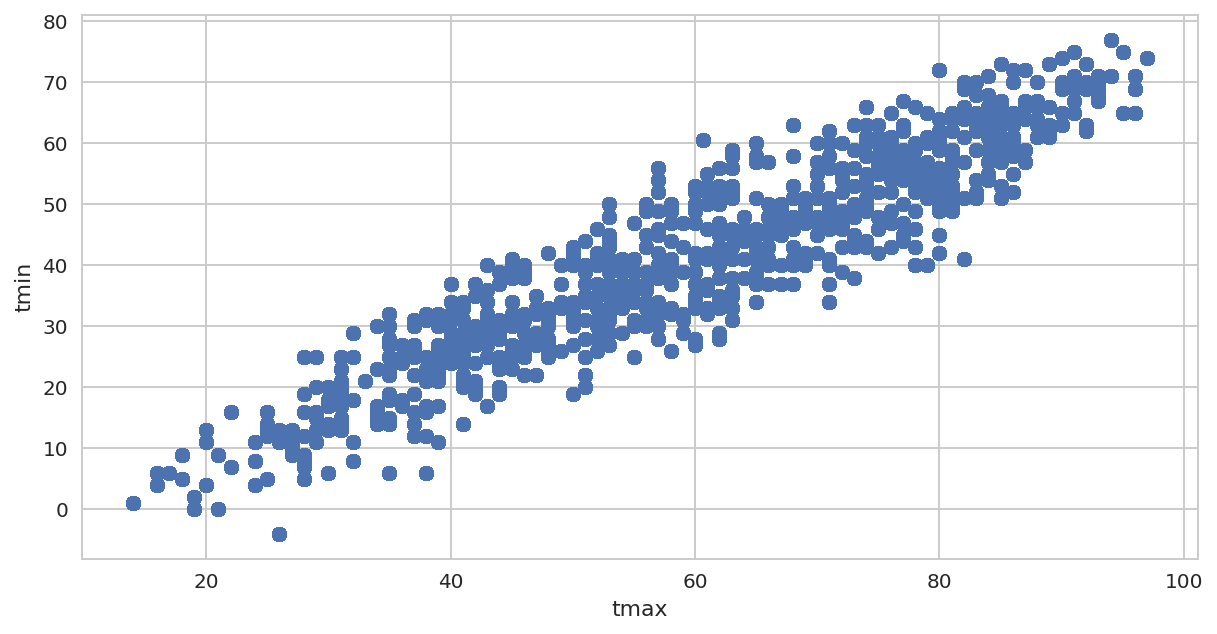

In [78]:
# tmax vs tmin
plt.figure(figsize=(10,5))
x1 = df_s_1['tmax']
y1 = df_s_1['tmin']
plt.xlabel('tmax')
plt.ylabel('tmin')
plt.scatter(x1, y1)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


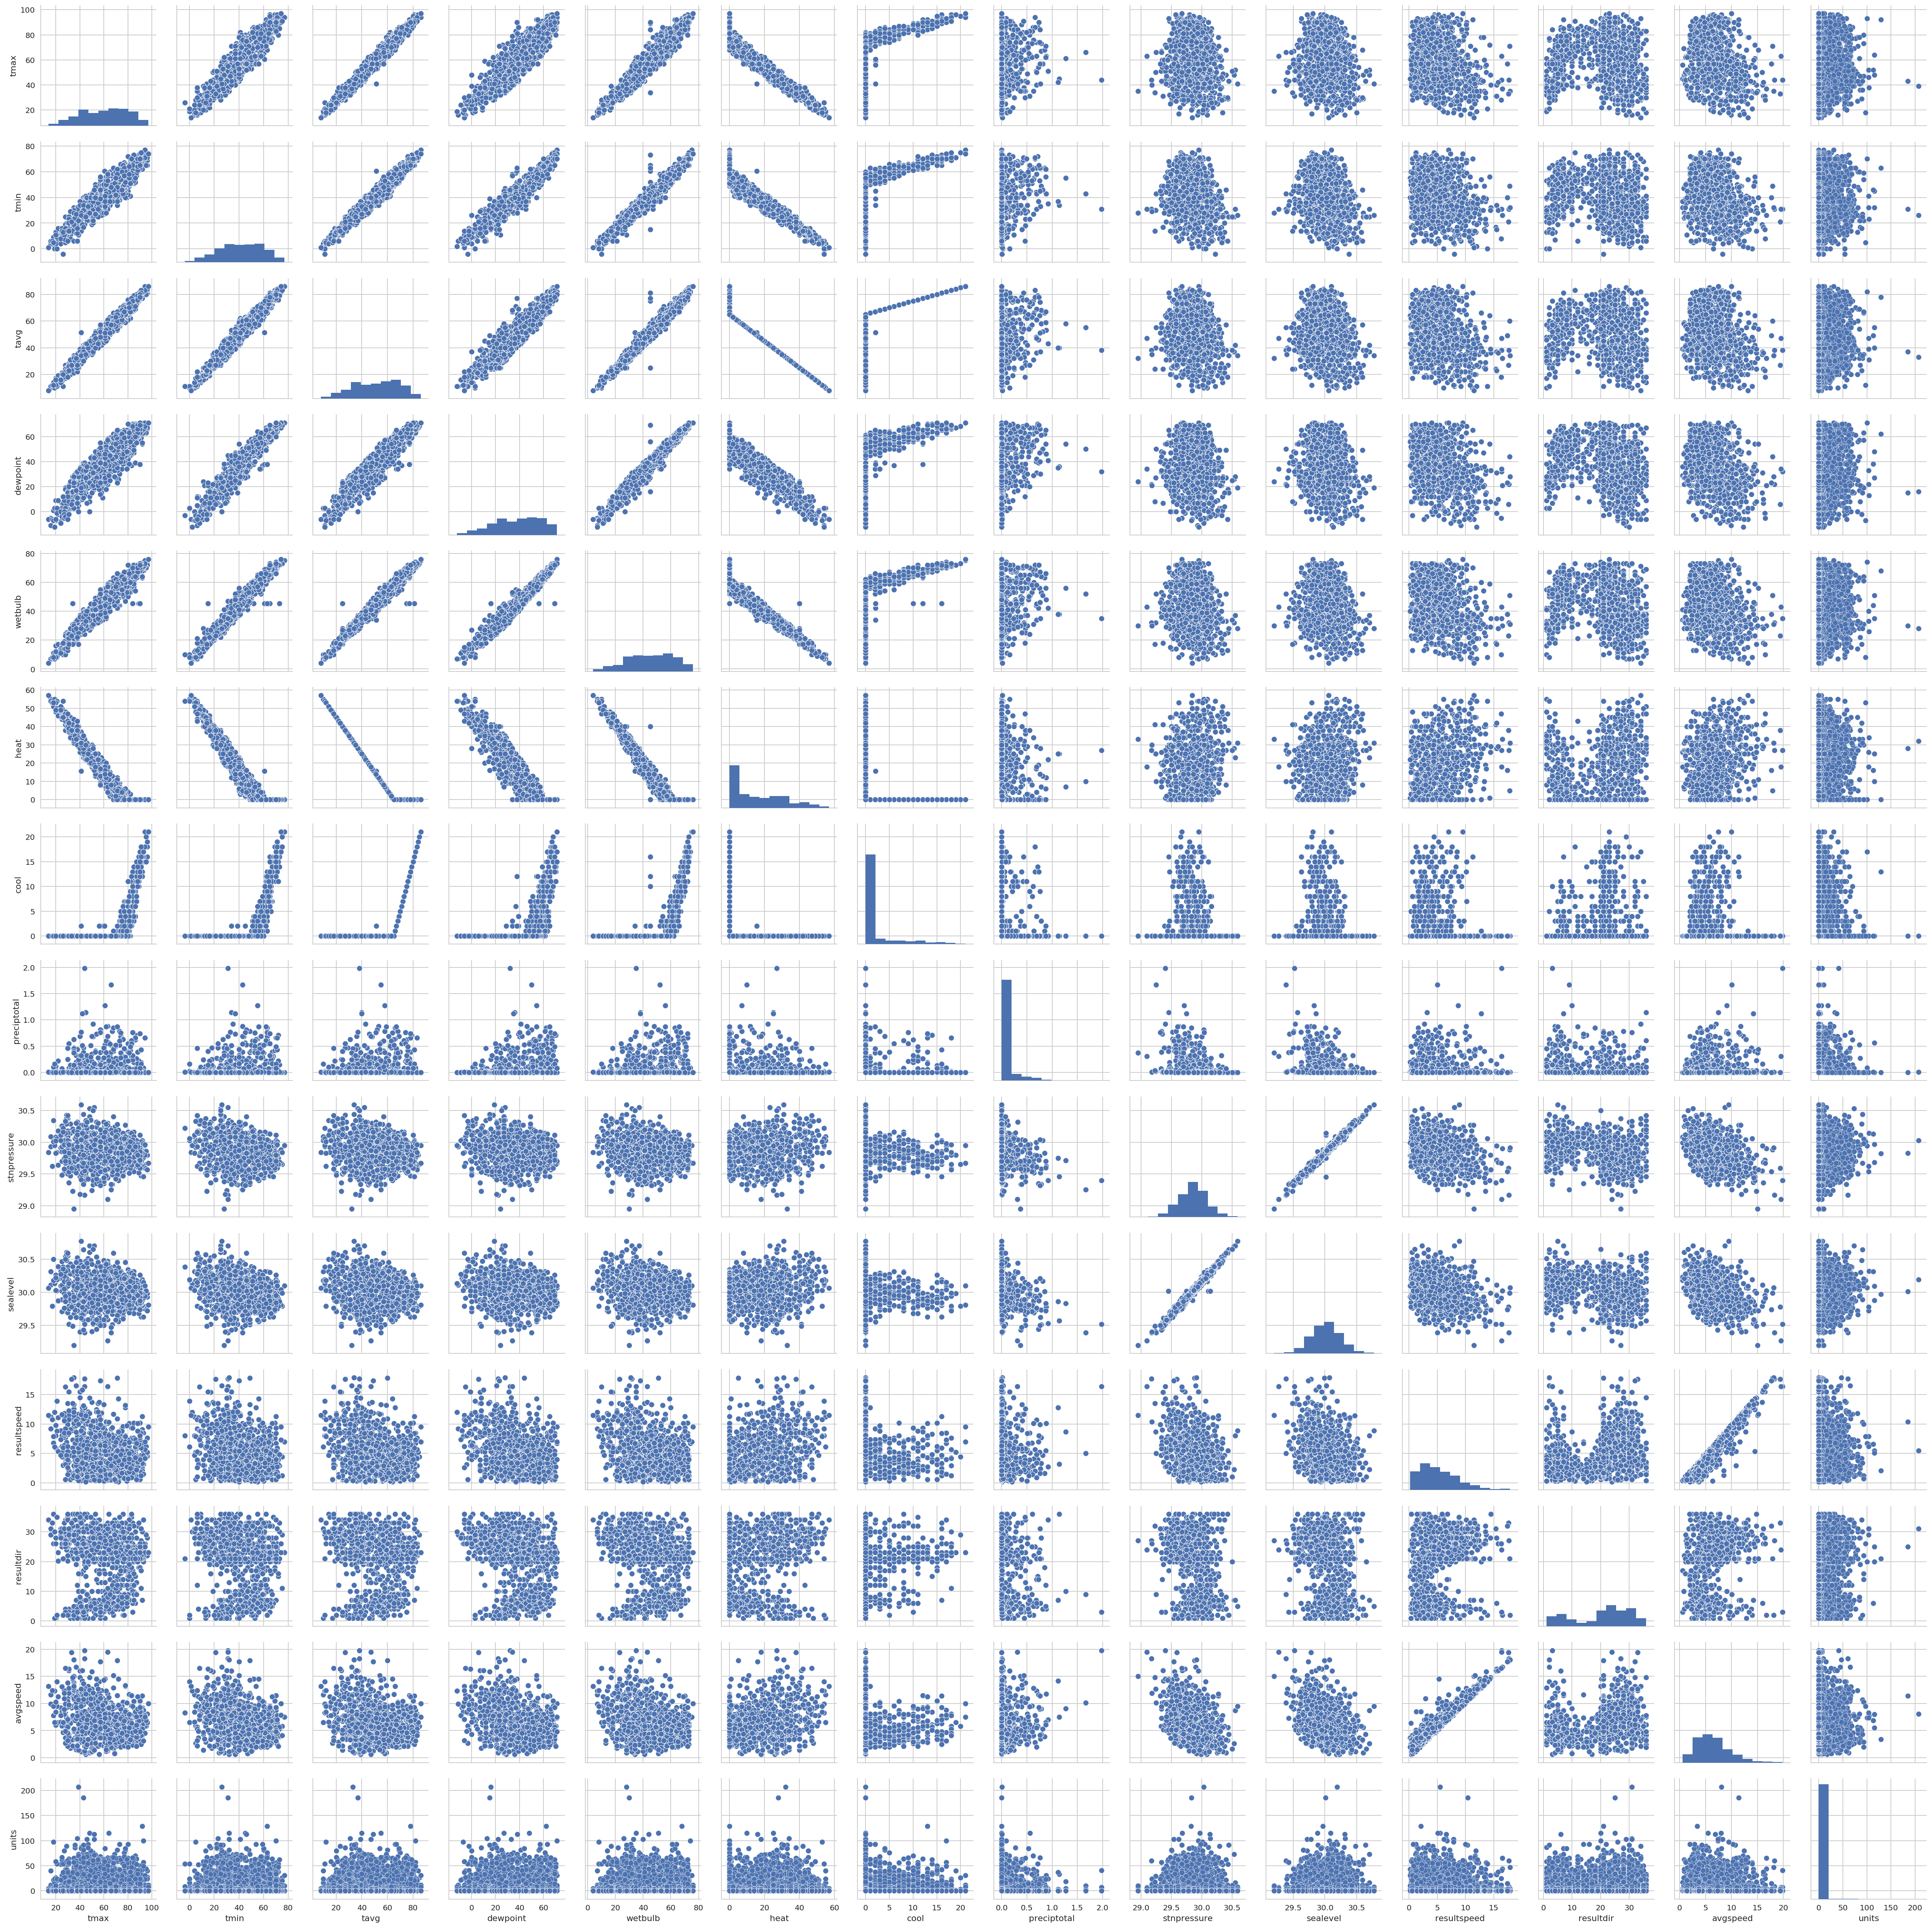

In [145]:
df1_col = df_s_1.columns.drop(['date', 'depart', 'sunrise', 'sunset', 'snowfall', 'store_nbr', 'station_nbr', 'item_nbr'])
sns.pairplot(df_s_1[df1_col])
plt.show()